## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('Hospital General Information.csv', encoding='latin1')

In [5]:
data.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN


## EDA

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4812 non-null   int64 
 1   Hospital Name                                                  4812 non-null   object
 2   Address                                                        4812 non-null   object
 3   City                                                           4812 non-null   object
 4   State                                                          4812 non-null   object
 5   ZIP Code                                                       4812 non-null   int64 
 6   County Name                                                    4797 non-null   object
 7   Phone Number                                                   4812 n

In [7]:
data.isnull().sum()


Provider ID                                                         0
Hospital Name                                                       0
Address                                                             0
City                                                                0
State                                                               0
ZIP Code                                                            0
County Name                                                        15
Phone Number                                                        0
Hospital Type                                                       0
Hospital Ownership                                                  0
Emergency Services                                                  0
Meets criteria for meaningful use of EHRs                         143
Hospital overall rating                                             0
Hospital overall rating footnote                                 3414
Mortality national c

In [8]:
data["Hospital overall rating footnote"].value_counts()


Hospital overall rating footnote
There are too few measures or measure groups reported to calculate a star rating or measure group score                                        995
Data are shown only for hospitals that participate in the Inpatient Quality Reporting (IQR) and Outpatient Quality Reporting (OQR) programs    159
This hospitals star rating only includes data reported on inpatient services                                                                  153
Data suppressed by CMS for one or more quarters                                                                                                 49
Results are not available for this reporting period                                                                                             42
Name: count, dtype: int64

In [9]:
data = data.drop(["Hospital overall rating footnote", "Mortality national comparison footnote", 
          "Safety of care national comparison footnote", "Readmission national comparison footnote",
         "Readmission national comparison footnote", "Patient experience national comparison footnote",
         "Effectiveness of care national comparison footnote", "Timeliness of care national comparison footnote",
         "Efficient use of medical imaging national comparison footnote"], axis=1)

In [10]:
data.isnull().sum()


Provider ID                                               0
Hospital Name                                             0
Address                                                   0
City                                                      0
State                                                     0
ZIP Code                                                  0
County Name                                              15
Phone Number                                              0
Hospital Type                                             0
Hospital Ownership                                        0
Emergency Services                                        0
Meets criteria for meaningful use of EHRs               143
Hospital overall rating                                   0
Mortality national comparison                             0
Safety of care national comparison                        0
Readmission national comparison                           0
Patient experience national comparison  

In [11]:
data["Meets criteria for meaningful use of EHRs"].value_counts()


Meets criteria for meaningful use of EHRs
Y                4668
Not Available       1
Name: count, dtype: int64

In [12]:
data = data.dropna()
data.isnull().sum()

Provider ID                                             0
Hospital Name                                           0
Address                                                 0
City                                                    0
State                                                   0
ZIP Code                                                0
County Name                                             0
Phone Number                                            0
Hospital Type                                           0
Hospital Ownership                                      0
Emergency Services                                      0
Meets criteria for meaningful use of EHRs               0
Hospital overall rating                                 0
Mortality national comparison                           0
Safety of care national comparison                      0
Readmission national comparison                         0
Patient experience national comparison                  0
Effectiveness 

In [13]:
data.describe()


,Provider ID,ZIP Code,Phone Number
count,4655.000000,4655.000000,4.655000e+03
mean,266722.448335,53780.188614,5.849839e+09
std,154614.918602,26804.881596,2.328346e+09
min,10001.000000,603.000000,9.369338e+08
25%,140194.000000,32995.000000,4.017335e+09
50%,260011.000000,55066.000000,6.053844e+09
75%,390179.500000,75818.000000,7.877360e+09
max,670114.000000,99901.000000,9.898943e+09


In [14]:
data["Provider ID"].nunique()


4655

In [15]:
data["County Name"].value_counts()


County Name
LOS ANGELES    79
COOK           51
JEFFERSON      46
WASHINGTON     43
MONTGOMERY     41
               ..
YALOBUSHA       1
SHARKEY         1
BOLIVAR         1
LEFLORE         1
COMAL           1
Name: count, Length: 1547, dtype: int64

In [16]:
data["ZIP Code"].value_counts()


ZIP Code
77030    6
76104    5
75231    4
70508    4
48201    4
        ..
41653    1
40504    1
40741    1
42701    1
78962    1
Name: count, Length: 4298, dtype: int64

In [17]:
data = data.drop(["County Name", "ZIP Code", "Meets criteria for meaningful use of EHRs", 
                  "Provider ID", "Phone Number"], axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4655 entries, 0 to 4803
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Hospital Name                                         4655 non-null   object
 1   Address                                               4655 non-null   object
 2   City                                                  4655 non-null   object
 3   State                                                 4655 non-null   object
 4   Hospital Type                                         4655 non-null   object
 5   Hospital Ownership                                    4655 non-null   object
 6   Emergency Services                                    4655 non-null   object
 7   Hospital overall rating                               4655 non-null   object
 8   Mortality national comparison                         4655 non-null   obj

In [19]:
data["Hospital Name"].value_counts()

Hospital Name
MEMORIAL HOSPITAL                15
GOOD SAMARITAN HOSPITAL           7
ST JOSEPH HOSPITAL                7
COMMUNITY MEMORIAL HOSPITAL       7
MEMORIAL MEDICAL CENTER           6
                                 ..
SABETHA COMMUNITY HOSPITAL        1
GREENWOOD COUNTY HOSPITAL         1
HIAWATHA COMMUNITY HOSPITAL       1
RUSH COUNTY MEMORIAL HOSPITAL     1
WEIMAR MEDICAL CENTER             1
Name: count, Length: 4473, dtype: int64

In [20]:
data["Address"].value_counts()

Address
100 HOSPITAL DRIVE           7
200 HOSPITAL DRIVE           4
100 MEDICAL CENTER DRIVE     4
ONE HOSPITAL DRIVE           3
800 WASHINGTON STREET        2
                            ..
707 GRANT ST                 1
211 E EARL STREET            1
709 OAK STREET               1
235 WEST VINE  PO BOX 969    1
400 YOUENS DR                1
Name: count, Length: 4628, dtype: int64

In [21]:
data = data.drop(["Address", "Hospital Name"], axis=1)

In [22]:
data["Hospital Type"].value_counts()

Hospital Type
Acute Care Hospitals         3256
Critical Access Hospitals    1308
Childrens                      91
Name: count, dtype: int64

## Data Visualization

<Axes: xlabel='Hospital Type', ylabel='count'>

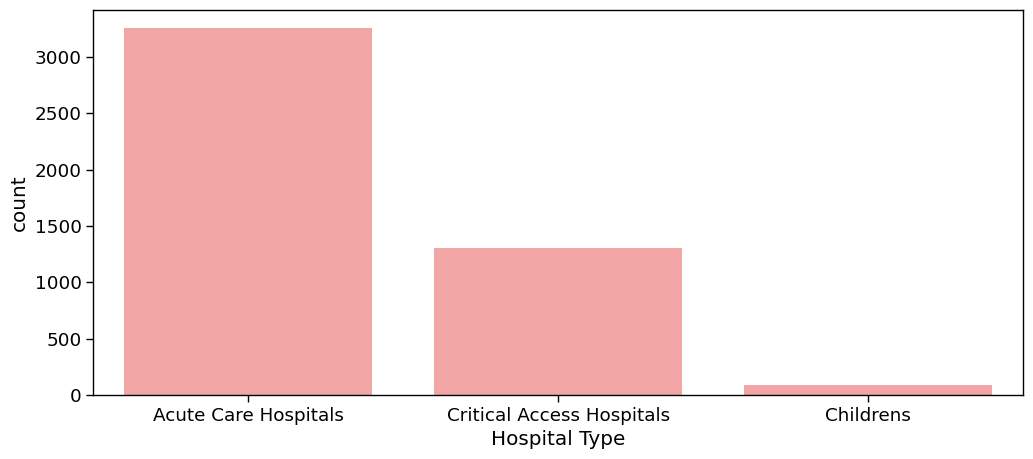

In [23]:
plt.figure(figsize=(12,5))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x=data["Hospital Type"], data=data, color="red", alpha=0.4)

In [24]:
data["Emergency Services"].value_counts()

Emergency Services
Yes    4398
No      257
Name: count, dtype: int64

<Axes: xlabel='Hospital Type', ylabel='count'>

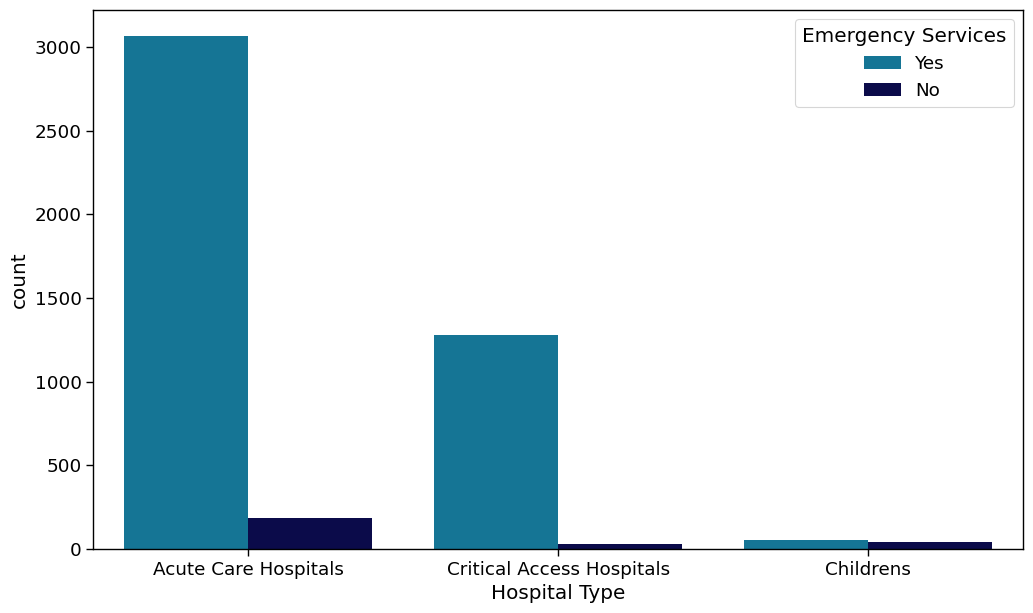

In [25]:
plt.figure(figsize=(12,7))
sns.countplot(x="Hospital Type", data=data, hue="Emergency Services", palette="ocean_r")

<Axes: xlabel='Emergency Services', ylabel='count'>

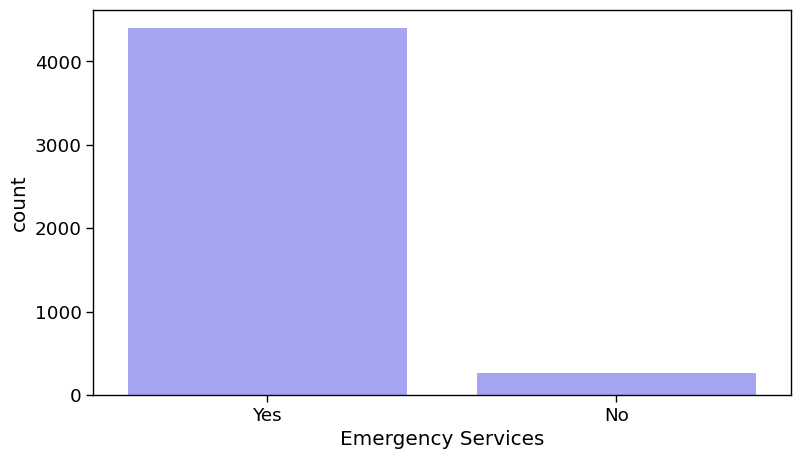

In [26]:
plt.figure(figsize=(9,5))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x="Emergency Services", data=data, color="blue", alpha=0.4)

In [27]:
data["Hospital Ownership"].value_counts()

Hospital Ownership
Voluntary non-profit - Private                 2003
Proprietary                                     753
Government - Hospital District or Authority     544
Voluntary non-profit - Other                    456
Government - Local                              392
Voluntary non-profit - Church                   341
Government - State                               60
Physician                                        55
Government - Federal                             42
Tribal                                            9
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Hospital Ownership'>

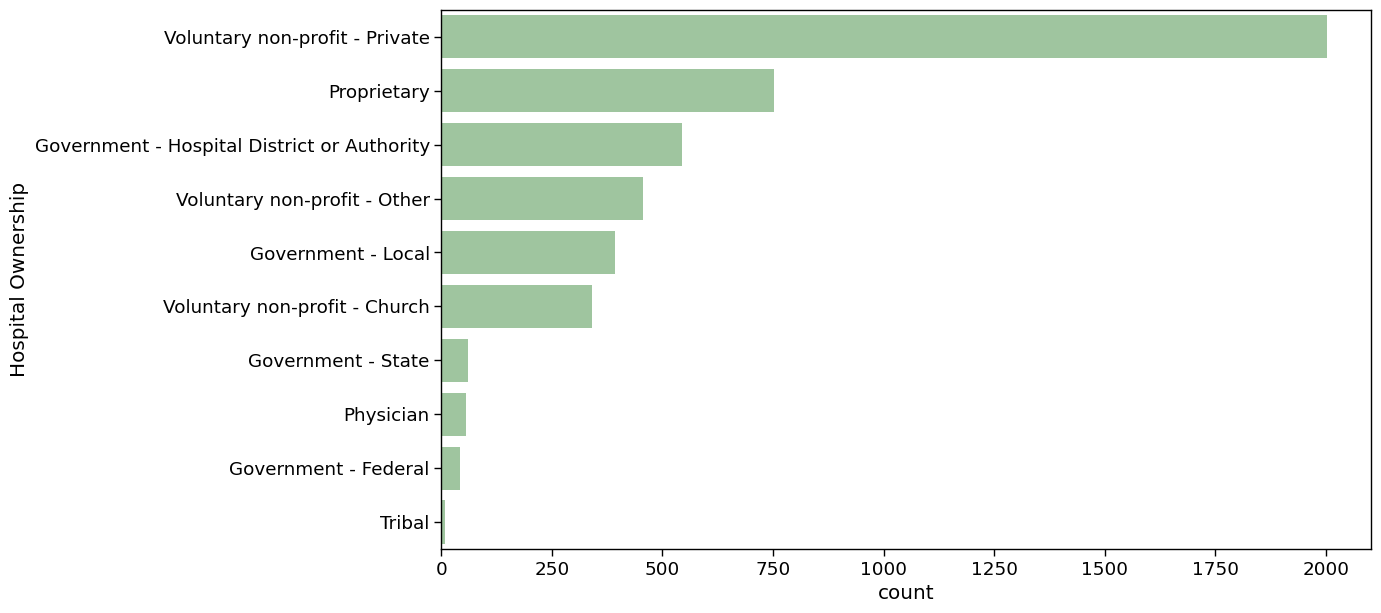

In [28]:
plt.figure(figsize=(12, 7))
sns.set_context("paper", font_scale=1.5)
order = data["Hospital Ownership"].value_counts().sort_values(ascending=False).index
sns.countplot(y="Hospital Ownership", data=data, color="green", alpha=0.4, order=order)

In [29]:
data["Hospital Ownership"].value_counts(normalize=True)*100

Hospital Ownership
Voluntary non-profit - Private                 43.029001
Proprietary                                    16.176155
Government - Hospital District or Authority    11.686359
Voluntary non-profit - Other                    9.795918
Government - Local                              8.421053
Voluntary non-profit - Church                   7.325456
Government - State                              1.288937
Physician                                       1.181525
Government - Federal                            0.902256
Tribal                                          0.193340
Name: proportion, dtype: float64

In [30]:
data["Hospital overall rating"].value_counts()

Hospital overall rating
3                1751
Not Available    1113
4                 931
2                 672
1                 107
5                  81
Name: count, dtype: int64

In [31]:
data = data.drop(data[data["Hospital overall rating"] == "Not Available"].index)

In [32]:
data["Hospital overall rating"].value_counts(normalize=True)*100

Hospital overall rating
3    49.435347
4    26.284585
2    18.972332
1     3.020892
5     2.286844
Name: proportion, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13640\3818329072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Hospital overall rating"], palette="plasma")


<Axes: xlabel='Hospital overall rating', ylabel='count'>

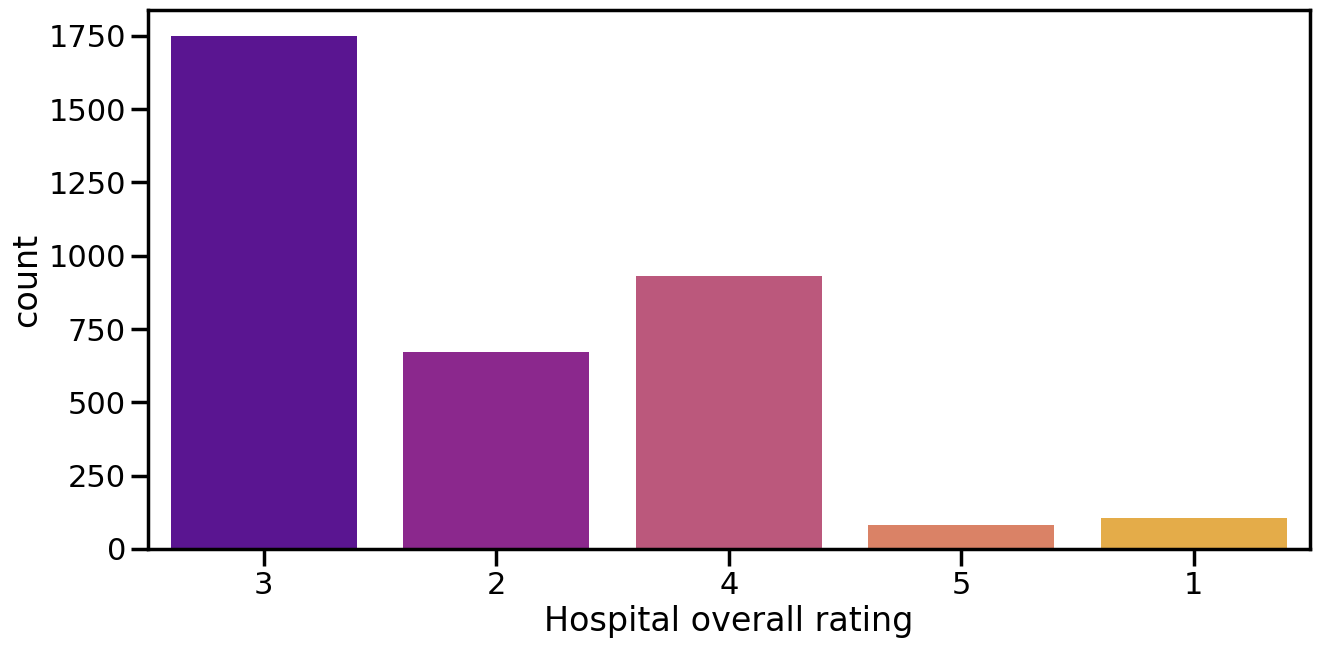

In [33]:
plt.figure(figsize=(15,7))
sns.set_context("poster", font_scale=1)
sns.countplot(x=data["Hospital overall rating"], palette="plasma")

In [34]:
data["Mortality national comparison"].value_counts()

Mortality national comparison
Same as the national average    2575
Above the national average       400
Below the national average       340
Not Available                    227
Name: count, dtype: int64

In [35]:
data = data.drop(data[data["Mortality national comparison"] == "Not Available"].index)

In [36]:
data["Mortality national comparison"].value_counts(normalize=True)*100

Mortality national comparison
Same as the national average    77.677225
Above the national average      12.066365
Below the national average      10.256410
Name: proportion, dtype: float64

<Axes: xlabel='Mortality national comparison', ylabel='count'>

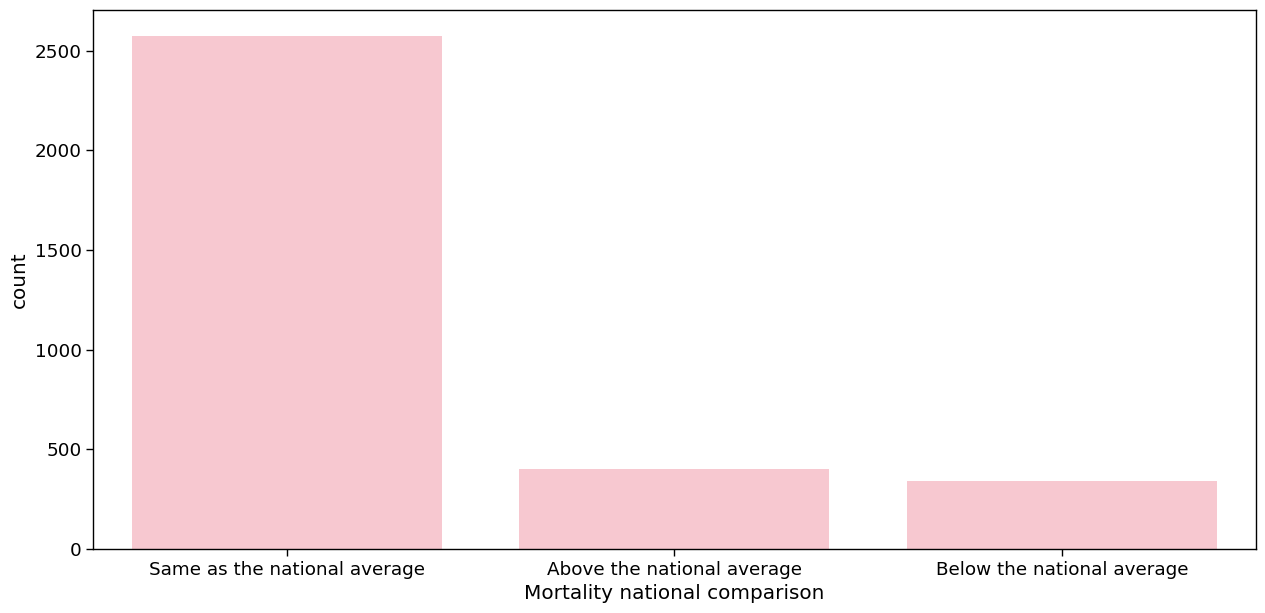

In [37]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=1.5)
mortality_order = data["Mortality national comparison"].value_counts().sort_values(ascending=False).index
sns.countplot(x=data["Mortality national comparison"], color="pink", order=mortality_order)

In [38]:
data["Safety of care national comparison"].value_counts()

Safety of care national comparison
Same as the national average    1109
Not Available                    781
Above the national average       770
Below the national average       655
Name: count, dtype: int64

In [39]:
data = data.drop(data[data["Safety of care national comparison"] == "Not Available"].index)


In [40]:
data["Safety of care national comparison"].value_counts(normalize=True)*100


Safety of care national comparison
Same as the national average    43.764799
Above the national average      30.386740
Below the national average      25.848461
Name: proportion, dtype: float64

<Axes: xlabel='Safety of care national comparison', ylabel='count'>

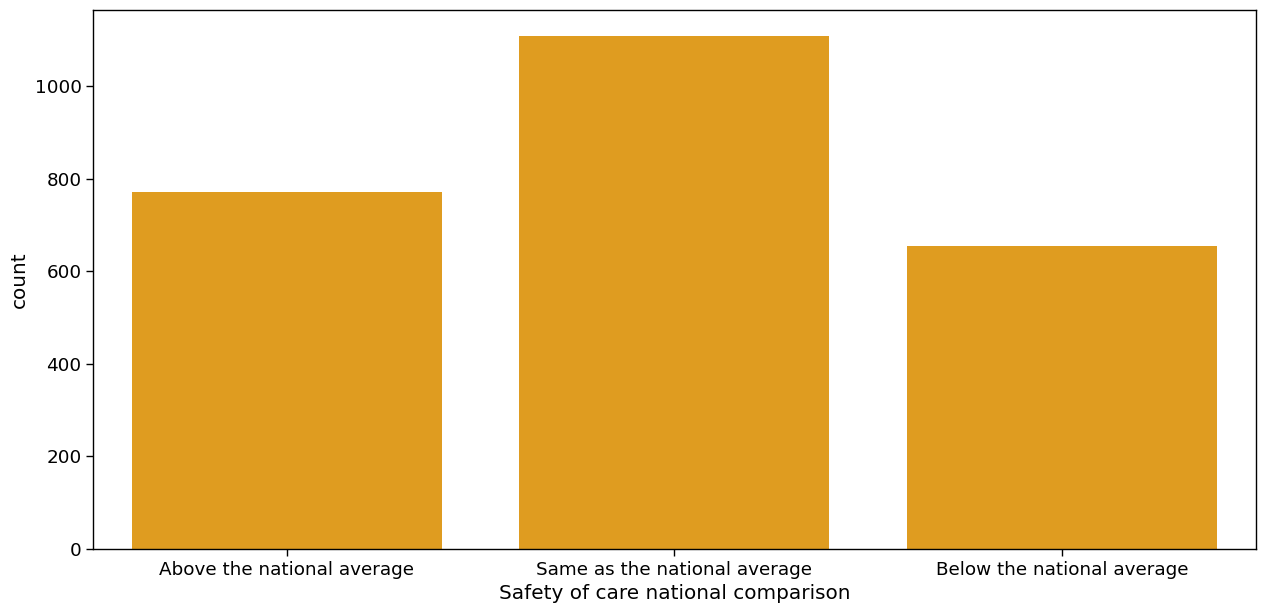

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Safety of care national comparison"], color="orange")

In [42]:
data["Readmission national comparison"].value_counts()


Readmission national comparison
Same as the national average    961
Below the national average      807
Above the national average      766
Name: count, dtype: int64

<Axes: xlabel='Readmission national comparison', ylabel='count'>

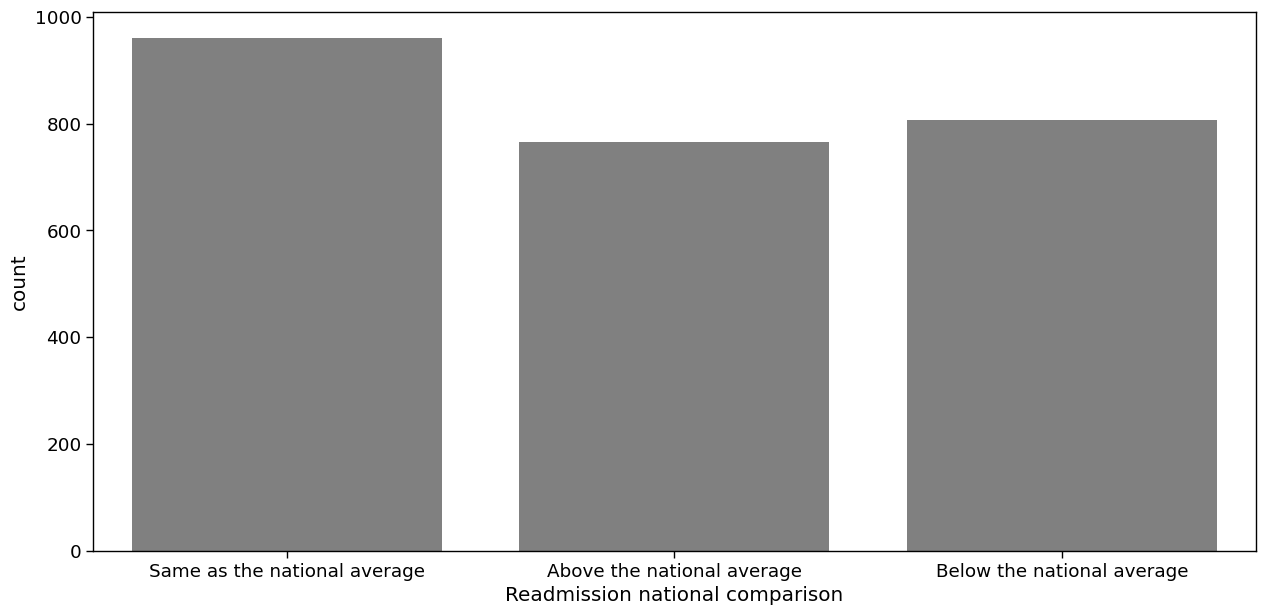

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Readmission national comparison"], color="grey")

In [44]:
data["Patient experience national comparison"].value_counts()

Patient experience national comparison
Below the national average      986
Same as the national average    837
Above the national average      703
Not Available                     8
Name: count, dtype: int64

In [45]:
data = data.drop(data[data["Patient experience national comparison"] == "Not Available"].index)

In [46]:
data["Patient experience national comparison"].value_counts(normalize=True)*100


Patient experience national comparison
Below the national average      39.034046
Same as the national average    33.135392
Above the national average      27.830562
Name: proportion, dtype: float64

<Axes: xlabel='Patient experience national comparison', ylabel='count'>

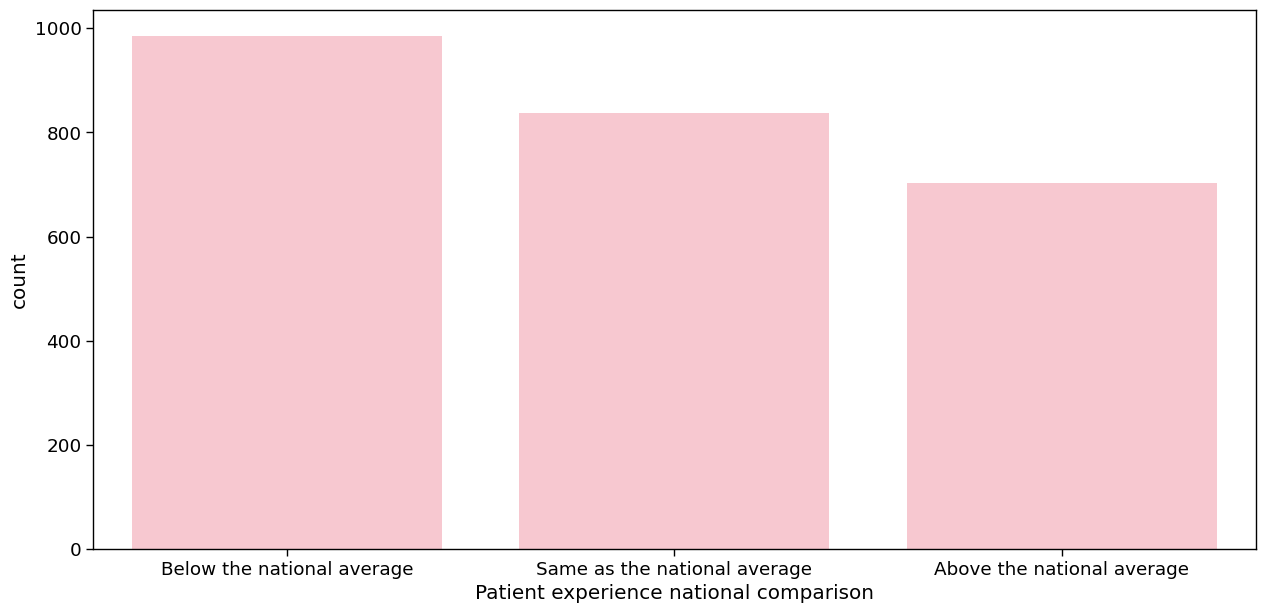

In [47]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Patient experience national comparison"], color="pink")

In [48]:
data["Effectiveness of care national comparison"].value_counts()


Effectiveness of care national comparison
Same as the national average    2231
Below the national average       166
Above the national average       124
Not Available                      5
Name: count, dtype: int64

In [49]:
data = data.drop(data[data["Effectiveness of care national comparison"] == "Not Available"].index)

In [50]:
data["Effectiveness of care national comparison"].value_counts(normalize=True)*100


Effectiveness of care national comparison
Same as the national average    88.496628
Below the national average       6.584689
Above the national average       4.918683
Name: proportion, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13640\3031590946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Effectiveness of care national comparison"], palette="viridis")


<Axes: xlabel='Effectiveness of care national comparison', ylabel='count'>

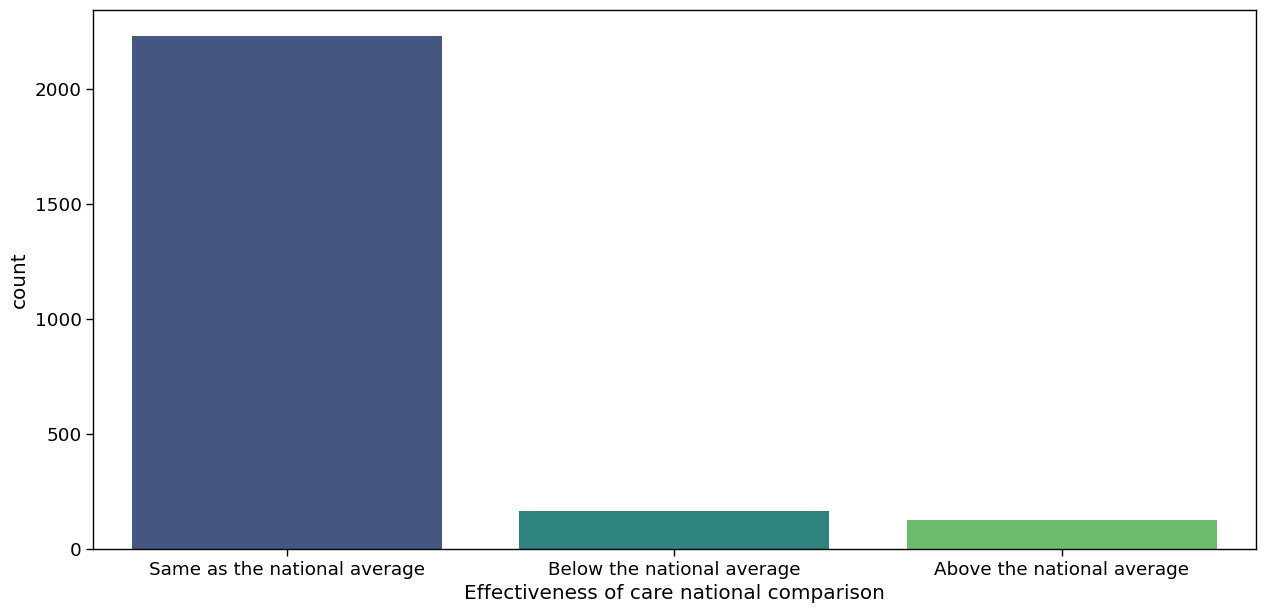

In [51]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Effectiveness of care national comparison"], palette="viridis")

In [52]:
data["Timeliness of care national comparison"].value_counts()


Timeliness of care national comparison
Same as the national average    1033
Below the national average       872
Above the national average       604
Not Available                     12
Name: count, dtype: int64

In [53]:
data = data.drop(data[data["Timeliness of care national comparison"] == "Not Available"].index)

In [54]:
data["Timeliness of care national comparison"].value_counts(normalize=True)*100


Timeliness of care national comparison
Same as the national average    41.171782
Below the national average      34.754882
Above the national average      24.073336
Name: proportion, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13640\1893636059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Timeliness of care national comparison"], palette="plasma")


<Axes: xlabel='Timeliness of care national comparison', ylabel='count'>

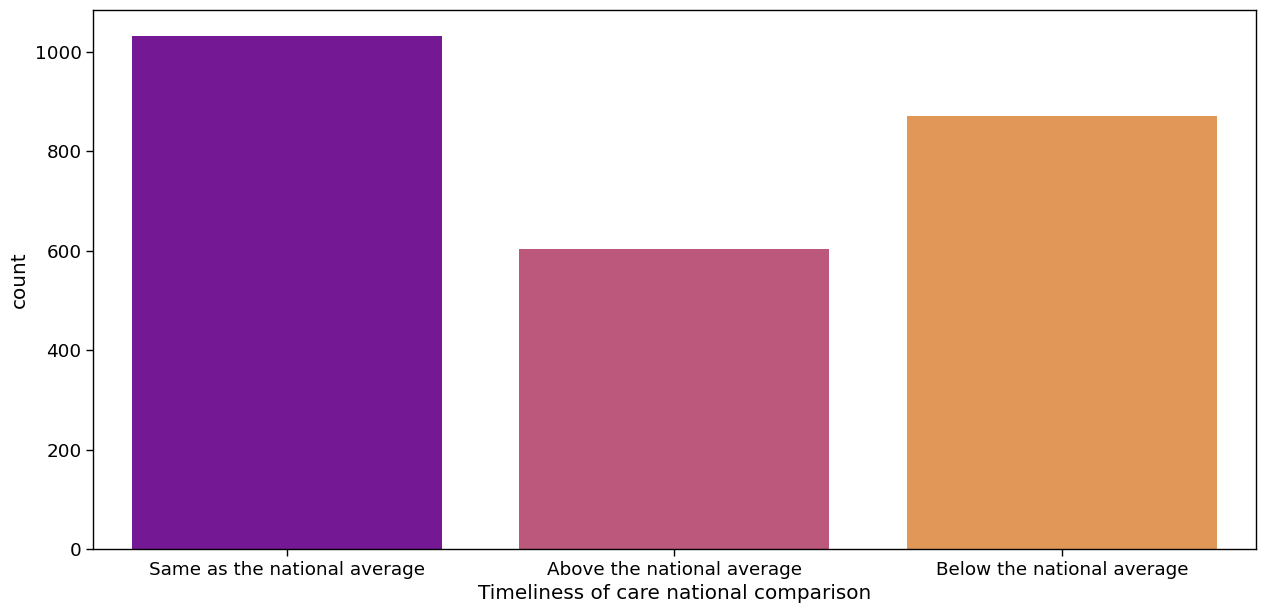

In [55]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Timeliness of care national comparison"], palette="plasma")

In [56]:
data["Efficient use of medical imaging national comparison"].value_counts()


Efficient use of medical imaging national comparison
Same as the national average    1635
Above the national average       356
Below the national average       306
Not Available                    212
Name: count, dtype: int64

In [57]:
data = data.drop(data[data["Efficient use of medical imaging national comparison"] == "Not Available"].index)

In [58]:
data["Efficient use of medical imaging national comparison"].value_counts(normalize=True)*100


Efficient use of medical imaging national comparison
Same as the national average    71.179800
Above the national average      15.498476
Below the national average      13.321724
Name: proportion, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13640\4278989582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Efficient use of medical imaging national comparison"], palette="cividis")


<Axes: xlabel='Efficient use of medical imaging national comparison', ylabel='count'>

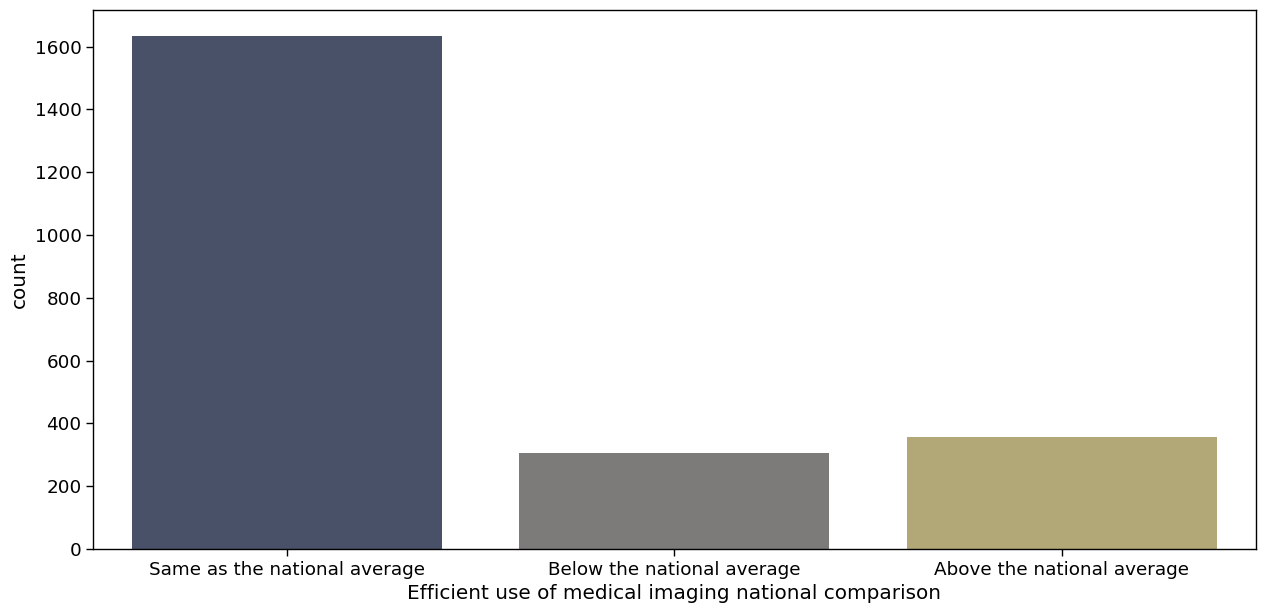

In [59]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Efficient use of medical imaging national comparison"], palette="cividis")

In [60]:
data["City"].value_counts()

City
CHICAGO            18
HOUSTON            13
PHILADELPHIA       12
COLUMBUS           10
WASHINGTON         10
                   ..
BOAZ                1
LAPEER              1
STANFORD            1
GRAND BLANC         1
COLLEGE STATION     1
Name: count, Length: 1474, dtype: int64

In [61]:
data = data.drop("City", axis=1)


In [62]:
data["State"].value_counts(normalize=True)*100


State
CA    7.575098
TX    7.139747
FL    6.181976
PA    4.832390
NY    4.788855
IL    4.658250
OH    4.614715
MI    3.569874
NC    3.134523
GA    3.090988
IN    2.873313
VA    2.742708
TN    2.655638
MO    2.568568
NJ    2.525033
WI    2.481498
KY    2.263822
MA    2.176752
AL    2.133217
WA    1.915542
LA    1.828472
OK    1.828472
SC    1.784937
AZ    1.697867
CO    1.610797
MN    1.567262
MS    1.436657
KS    1.262516
AR    1.175446
CT    1.175446
OR    1.131911
IA    1.088376
WV    1.001306
NV    0.740096
NE    0.696561
UT    0.696561
ME    0.696561
NM    0.609491
NH    0.522421
SD    0.435350
MT    0.435350
ID    0.435350
RI    0.391815
HI    0.348280
DC    0.304745
ND    0.261210
VT    0.261210
DE    0.261210
WY    0.261210
AK    0.130605
Name: proportion, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13640\1449729908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data["State"], palette="coolwarm", order=state_order)


Text(0.5, 0, 'Number of Hospitals')

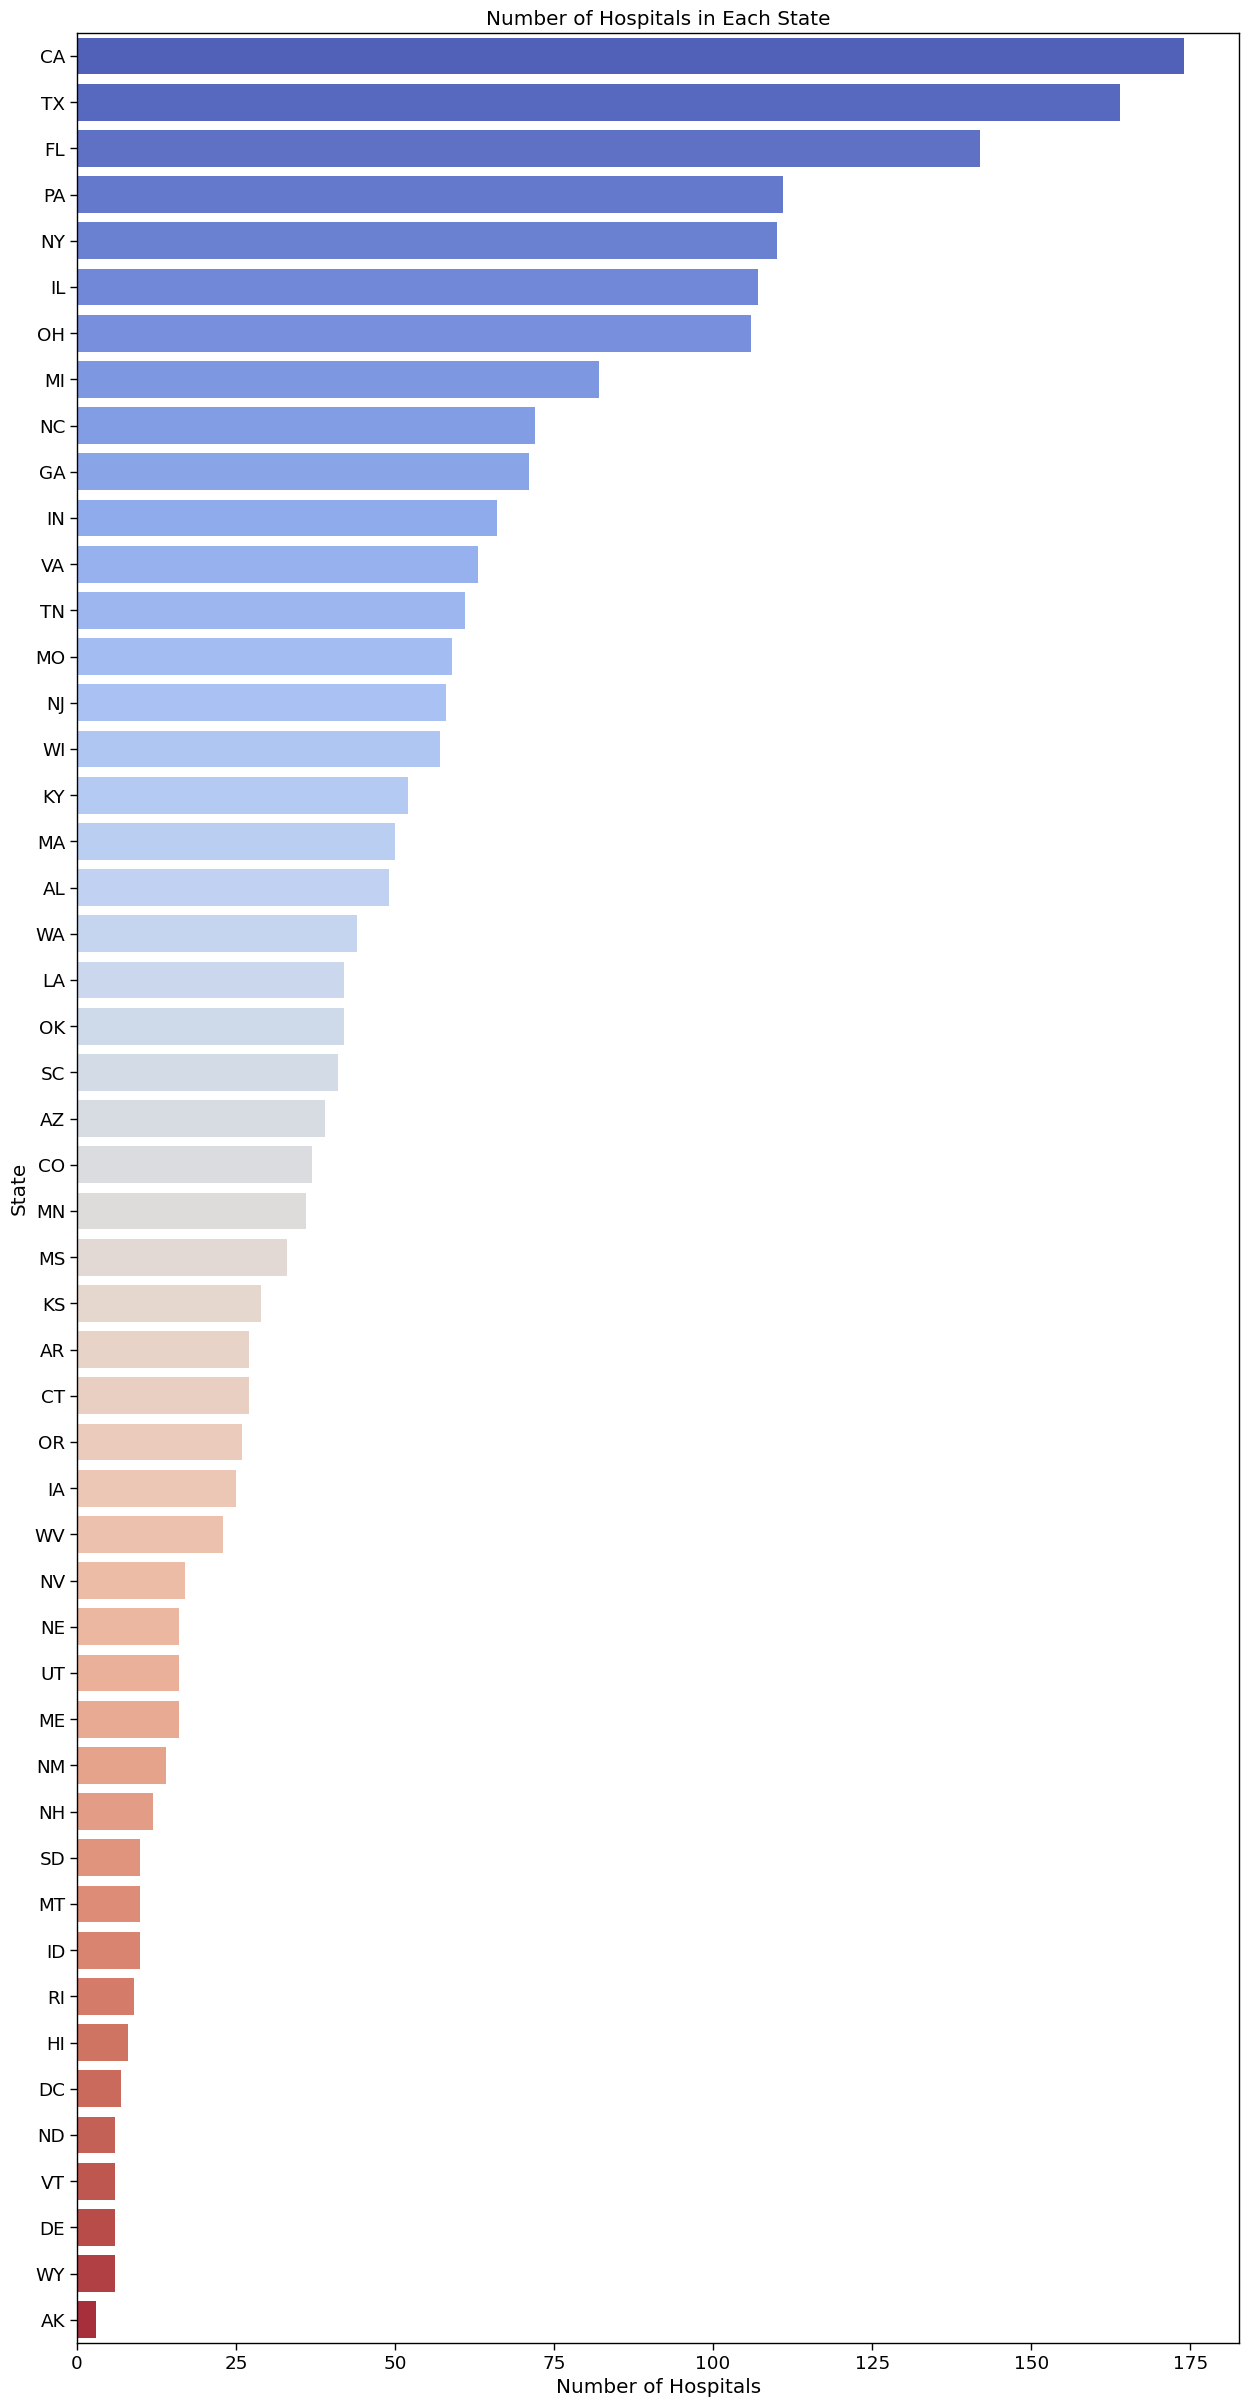

In [63]:
plt.figure(figsize=(15,30))
state_order = data["State"].value_counts().sort_values(ascending=False).index
sns.countplot(y=data["State"], palette="coolwarm", order=state_order)
plt.title("Number of Hospitals in Each State")
plt.xlabel("Number of Hospitals")

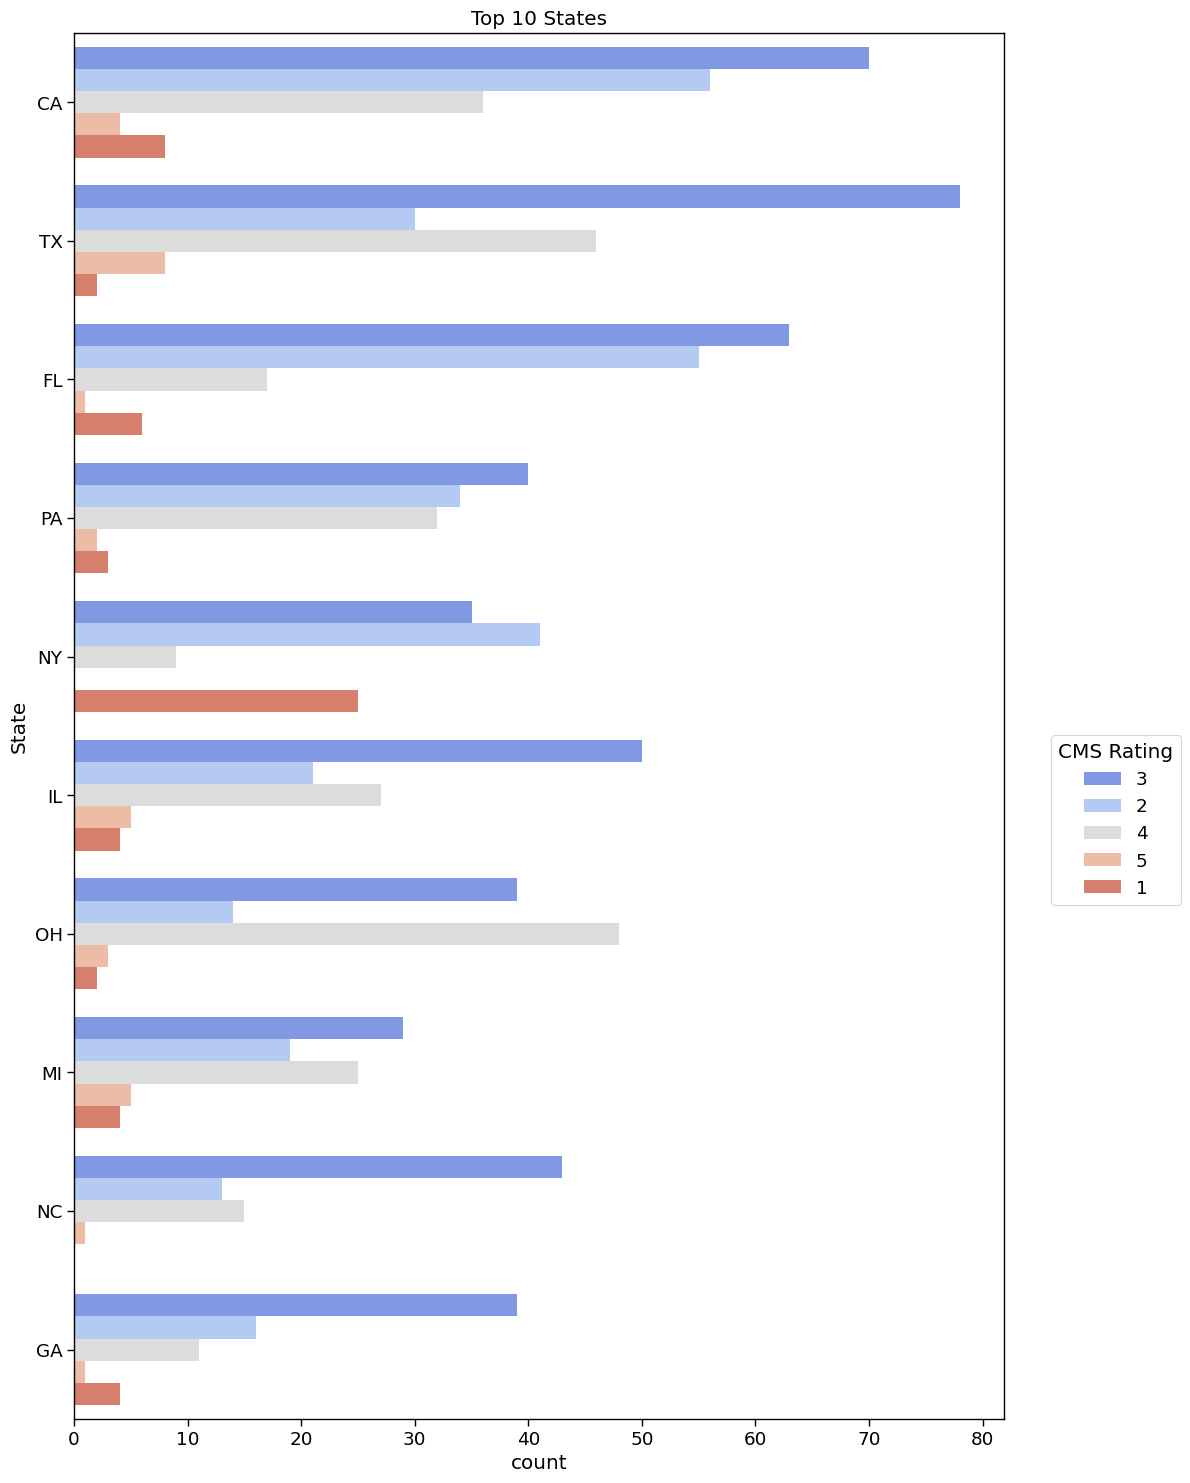

In [64]:
plt.figure(figsize=(12,18))
plt.title("Top 10 States")
state_order = data["State"].value_counts().sort_values(ascending=False)[:10].index
sns.countplot(y=data["State"], palette="coolwarm", order=state_order, data=data, hue="Hospital overall rating")
plt.legend(bbox_to_anchor=(1.2, 0.5), title="CMS Rating")

In [65]:
len(data[data["State"] == "TX"])


164

In [66]:
data[data["State"] == "TX"]["Hospital overall rating"].value_counts()


Hospital overall rating
3    78
4    46
2    30
5     8
1     2
Name: count, dtype: int64

In [67]:
len(data["Hospital overall rating"])


2297

In [68]:
data["Hospital overall rating"].value_counts()


Hospital overall rating
3    1048
4     577
2     519
1      94
5      59
Name: count, dtype: int64

In [69]:
high_star_prob = 59/len(data["Hospital overall rating"])*100
high_star_prob

2.5685676969960816

In [70]:
low_star_prob = 94/len(data["Hospital overall rating"])*100
low_star_prob

4.092294296909012

In [71]:
texas_high_prob = (8/164)
texas_usa_prob = (164/2297)
texas_high_usa_prob = (texas_high_prob*texas_usa_prob)*100
texas_high_usa_prob 

0.34828036569438403

In [72]:
newyork_low_prob = 25/110 
newyork_usa_prob = 110/2297
newyork_low_usa_prob = (newyork_low_prob*newyork_usa_prob)*100
newyork_low_usa_prob

1.0883761427949499

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2297 entries, 0 to 4784
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   State                                                 2297 non-null   object
 1   Hospital Type                                         2297 non-null   object
 2   Hospital Ownership                                    2297 non-null   object
 3   Emergency Services                                    2297 non-null   object
 4   Hospital overall rating                               2297 non-null   object
 5   Mortality national comparison                         2297 non-null   object
 6   Safety of care national comparison                    2297 non-null   object
 7   Readmission national comparison                       2297 non-null   object
 8   Patient experience national comparison                2297 non-null   obj

In [74]:
clean_state = pd.get_dummies(data["State"], prefix="State_", drop_first=True, dtype=int)
data = pd.concat([data.drop("State", axis=1), clean_state], axis=1)

In [75]:
data.head()

,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,...,State__SD,State__TN,State__TX,State__UT,State__VA,State__VT,State__WA,State__WI,State__WV,State__WY
0,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3,Same as the national average,Above the national average,Same as the national average,Below the national average,Same as the national average,Same as the national average,...,0,0,0,0,0,0,0,0,0,0
1,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,...,0,0,0,0,0,0,0,0,0,0
2,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,Below the national average,Same as the national average,Same as the national average,Below the national average,Same as the national average,Above the national average,...,0,0,0,0,0,0,0,0,0,0
5,Acute Care Hospitals,Voluntary non-profit - Private,Yes,2,Same as the national average,Below the national average,Same as the national average,Below the national average,Below the national average,Same as the national average,...,0,0,0,0,0,0,0,0,0,0
6,Acute Care Hospitals,Proprietary,Yes,3,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average,...,0,0,0,0,0,0,0,0,0,0


In [76]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2297 entries, 0 to 4784
Data columns (total 60 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Hospital Type                                         2297 non-null   object
 1   Hospital Ownership                                    2297 non-null   object
 2   Emergency Services                                    2297 non-null   object
 3   Hospital overall rating                               2297 non-null   object
 4   Mortality national comparison                         2297 non-null   object
 5   Safety of care national comparison                    2297 non-null   object
 6   Readmission national comparison                       2297 non-null   object
 7   Patient experience national comparison                2297 non-null   object
 8   Effectiveness of care national comparison             2297 non-null   obj

In [77]:
dummy_column = data.iloc[:, 0:3]


In [78]:
clean_column = pd.get_dummies(dummy_column, drop_first=True, dtype=int)
data = pd.concat([data.drop(dummy_column, axis=1), clean_column], axis=1)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2297 entries, 0 to 4784
Data columns (total 67 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Hospital overall rating                                         2297 non-null   object
 1   Mortality national comparison                                   2297 non-null   object
 2   Safety of care national comparison                              2297 non-null   object
 3   Readmission national comparison                                 2297 non-null   object
 4   Patient experience national comparison                          2297 non-null   object
 5   Effectiveness of care national comparison                       2297 non-null   object
 6   Timeliness of care national comparison                          2297 non-null   object
 7   Efficient use of medical imaging national comparison            2

In [80]:
dummy_columns = data.iloc[:, 1:8]


In [81]:
clean_columns = pd.get_dummies(dummy_columns, drop_first=True, dtype=int)
data = pd.concat([data.drop(dummy_columns, axis=1), clean_columns], axis=1)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2297 entries, 0 to 4784
Data columns (total 74 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   Hospital overall rating                                                            2297 non-null   object
 1   State__AL                                                                          2297 non-null   int32 
 2   State__AR                                                                          2297 non-null   int32 
 3   State__AZ                                                                          2297 non-null   int32 
 4   State__CA                                                                          2297 non-null   int32 
 5   State__CO                                                                          2297 non-null   int32 
 6   State

In [83]:
data["Hospital overall rating"] = data["Hospital overall rating"].astype(str).astype(int)

In [84]:
data["Hospital overall rating"] = data["Hospital overall rating"].map({1:0, 2:0, 3:0, 4:1, 5:1})

In [85]:
data["Hospital overall rating"].value_counts()

Hospital overall rating
0    1661
1     636
Name: count, dtype: int64

In [86]:
data.describe()

,Hospital overall rating,State__AL,State__AR,State__AZ,State__CA,State__CO,State__CT,State__DC,State__DE,State__FL,...,Readmission national comparison_Below the national average,Readmission national comparison_Same as the national average,Patient experience national comparison_Below the national average,Patient experience national comparison_Same as the national average,Effectiveness of care national comparison_Below the national average,Effectiveness of care national comparison_Same as the national average,Timeliness of care national comparison_Below the national average,Timeliness of care national comparison_Same as the national average,Efficient use of medical imaging national comparison_Below the national average,Efficient use of medical imaging national comparison_Same as the national average
count,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.00000,...,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000
mean,0.276883,0.021332,0.011754,0.016979,0.075751,0.016108,0.011754,0.003047,0.002612,0.06182,...,0.328254,0.353069,0.378320,0.333478,0.063561,0.883761,0.353069,0.413148,0.133217,0.711798
std,0.447556,0.144521,0.107802,0.129219,0.264657,0.125918,0.107802,0.055132,0.051053,0.24088,...,0.469680,0.478028,0.485074,0.471558,0.244023,0.320581,0.478028,0.492506,0.339883,0.453024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Selection and Training

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = data.drop("Hospital overall rating", axis=1)
y = data["Hospital overall rating"]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
neighbor = KNeighborsClassifier(n_neighbors=10)

In [92]:
neighbor.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [93]:
neighbor_predict = neighbor.predict(X_test)

In [94]:
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
print(confusion_matrix(y_test, neighbor_predict))
print(classification_report(y_test, neighbor_predict))

[[315  19]
 [ 52  74]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       334
           1       0.80      0.59      0.68       126

    accuracy                           0.85       460
   macro avg       0.83      0.77      0.79       460
weighted avg       0.84      0.85      0.84       460



In [96]:
error_rate = []

for i in range(1,40):
    neighbor = KNeighborsClassifier(n_neighbors = i)
    neighbor.fit(X_train, y_train)
    knnpredict = neighbor.predict(X_test)
    error_rate.append(np.mean(knnpredict != y_test))

Text(0, 0.5, 'Error Rate')

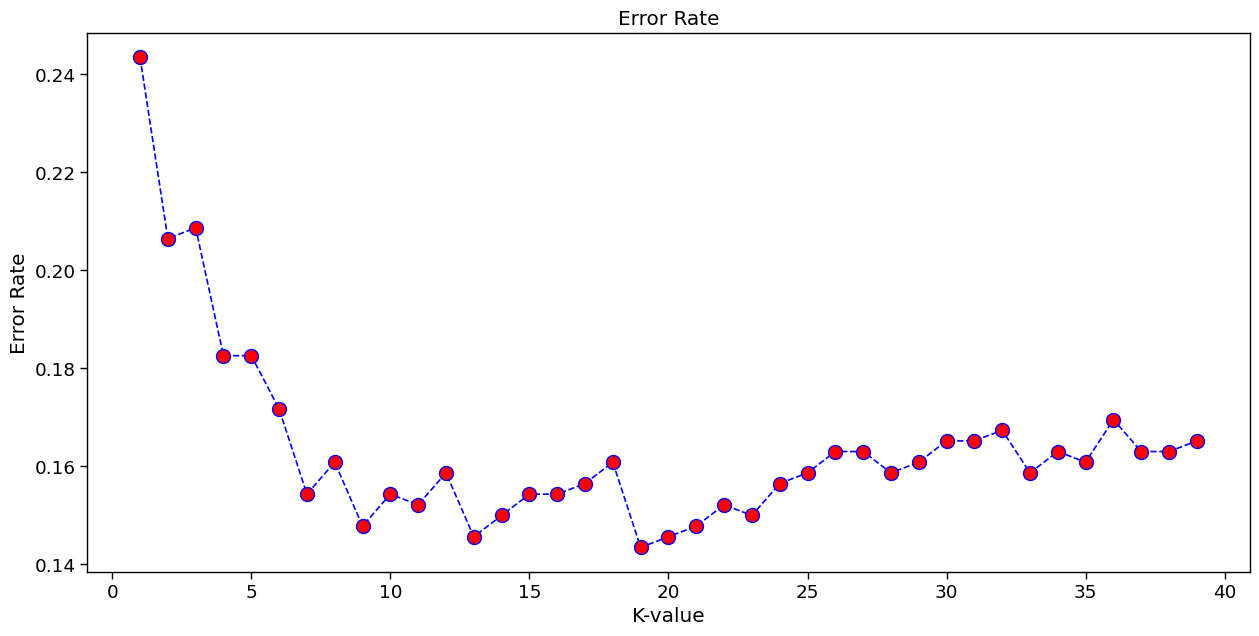

In [97]:
plt.figure(figsize=(15,7))
plt.plot(range(1,40), error_rate, color="blue", ls="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate")
plt.xlabel("K-value")
plt.ylabel("Error Rate")

In [98]:
neighbor = KNeighborsClassifier(n_neighbors=19)
neighbor.fit(X_train, y_train)
knnpredict = neighbor.predict(X_test)

In [99]:
print(classification_report(y_test, knnpredict))
print(confusion_matrix(y_test, knnpredict))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       334
           1       0.79      0.64      0.71       126

    accuracy                           0.86       460
   macro avg       0.83      0.79      0.81       460
weighted avg       0.85      0.86      0.85       460

[[313  21]
 [ 45  81]]


In [100]:
from sklearn.svm import SVC

In [101]:
support = SVC(random_state=42)

In [102]:
support.fit(X_train, y_train)

SVC(random_state=42)

In [103]:
support_predict = support.predict(X_test)

In [104]:
print(classification_report(y_test, support_predict))
print(confusion_matrix(y_test, support_predict))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       334
           1       0.79      0.73      0.76       126

    accuracy                           0.87       460
   macro avg       0.85      0.83      0.84       460
weighted avg       0.87      0.87      0.87       460

[[310  24]
 [ 34  92]]


In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
random_forest = RandomForestClassifier(n_estimators=300, bootstrap=True, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [107]:
random_forest_predict = random_forest.predict(X_test)

In [108]:
print(classification_report(y_test, random_forest_predict))
print(confusion_matrix(y_test, random_forest_predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       334
           1       0.79      0.67      0.72       126

    accuracy                           0.86       460
   macro avg       0.83      0.80      0.81       460
weighted avg       0.85      0.86      0.85       460

[[311  23]
 [ 42  84]]


In [109]:
report = [["Support Vector Machines", 0.87, 0.87, 0.87, 0.87], ["Random Forest", 0.86, 0.85, 0.86, 0.85], 
          ["K-nearest neighbor", 0.86, 0.85, 0.86, 0.85]]
overall_result = pd.DataFrame(report, columns=["Model", "Accuracy Score", "Precision", "Recall", "F1-score"])
overall_result.sort_values("F1-score", ascending=False)

,Model,Accuracy Score,Precision,Recall,F1-score
0,Support Vector Machines,0.87,0.87,0.87,0.87
1,Random Forest,0.86,0.85,0.86,0.85
2,K-nearest neighbor,0.86,0.85,0.86,0.85
